In [1]:
from datetime import date, timedelta
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from src.core.repositories.stock_repository import get_repository, StockRepositoryConfig
from server.config import config as server_config
from src.core.lib.analysis.returns import returns

In [3]:
start = date.today() - timedelta(weeks=52)
end = date.today()

In [4]:
iex_config = server_config['sandbox']['iexcloud']
mysql_config = server_config['sandbox']['db']

In [5]:
repo = get_repository(iex_config=iex_config, mysql_config=mysql_config)

In [7]:
sbux = repo.historical_daily('SBUX', start=start, end=end)

In [9]:
sbux.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-09-21 to 2021-09-17
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   close                 251 non-null    object
 1   high                  251 non-null    object
 2   low                   251 non-null    object
 3   open                  251 non-null    object
 4   symbol                251 non-null    object
 5   volume                251 non-null    object
 6   id                    251 non-null    object
 7   key                   251 non-null    object
 8   subkey                251 non-null    object
 9   updated               251 non-null    object
 10  changeOverTime        251 non-null    object
 11  marketChangeOverTime  251 non-null    object
 12  uOpen                 251 non-null    object
 13  uClose                251 non-null    object
 14  uHigh                 251 non-null    object
 15  uLow                 

<AxesSubplot:>

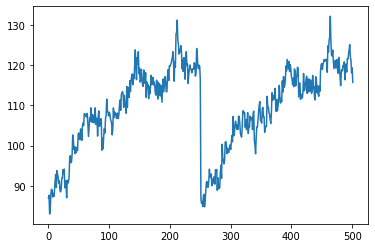

In [8]:
sbux['close'].plot()

In [9]:
sbux['prev_close'] = sbux['close'].shift(1)

In [10]:
sbux['return'] = sbux['close'] / sbux['prev_close'] - 1

<AxesSubplot:>

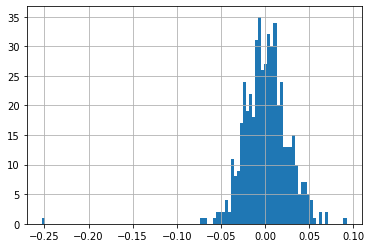

In [11]:
sbux['return'].hist(bins=100)

In [12]:
sbux['return'].mean(), sbux['return'].std()

(0.000920413766610151, 0.026057120710022263)

In [13]:
sbux['log_return'] = np.log(sbux['return'].astype(float) + 1)

<AxesSubplot:>

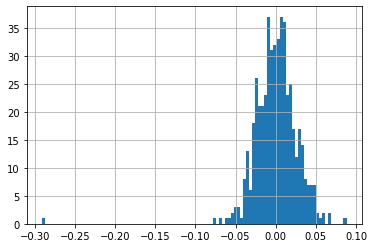

In [14]:
sbux['log_return'].hist(bins=100)

In [15]:
x_list = np.linspace(sbux['return'].min(), sbux['return'].max(), 100)
y_list = norm.pdf(x_list, loc=sbux['return'].mean(), scale=sbux['return'].std())

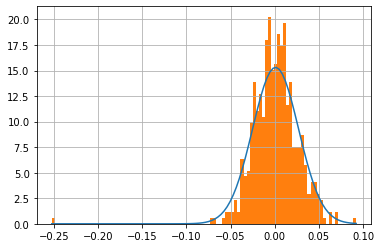

In [16]:
plt.plot(x_list, y_list);
sbux['return'].hist(bins=100, density=True);

In [19]:
import statsmodels.api as sm

/mnt/c/Users/Tim/src/money-printer/src/.venv/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


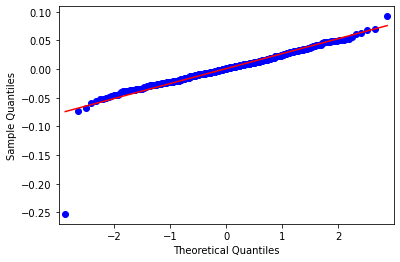

In [20]:
sm.qqplot(sbux['return'].astype(float).dropna(), line='s');

In [21]:
x_list_log = np.linspace(sbux['log_return'].min(), sbux['log_return'].max(), 100)
y_list_log = norm.pdf(x_list, loc=sbux['log_return'].mean(), scale=sbux['log_return'].std())

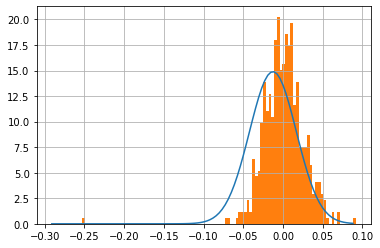

In [22]:
plt.plot(x_list_log, y_list_log);
sbux['return'].hist(bins=100, density=True);

/mnt/c/Users/Tim/src/money-printer/src/.venv/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


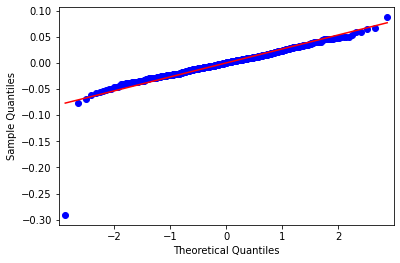

In [23]:
sm.qqplot(sbux['log_return'].astype(float).dropna(), line='s');